In [2]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
country = geopandas.read_file("gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [4]:
type(country)

geopandas.geodataframe.GeoDataFrame

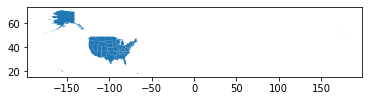

In [5]:
country.plot()

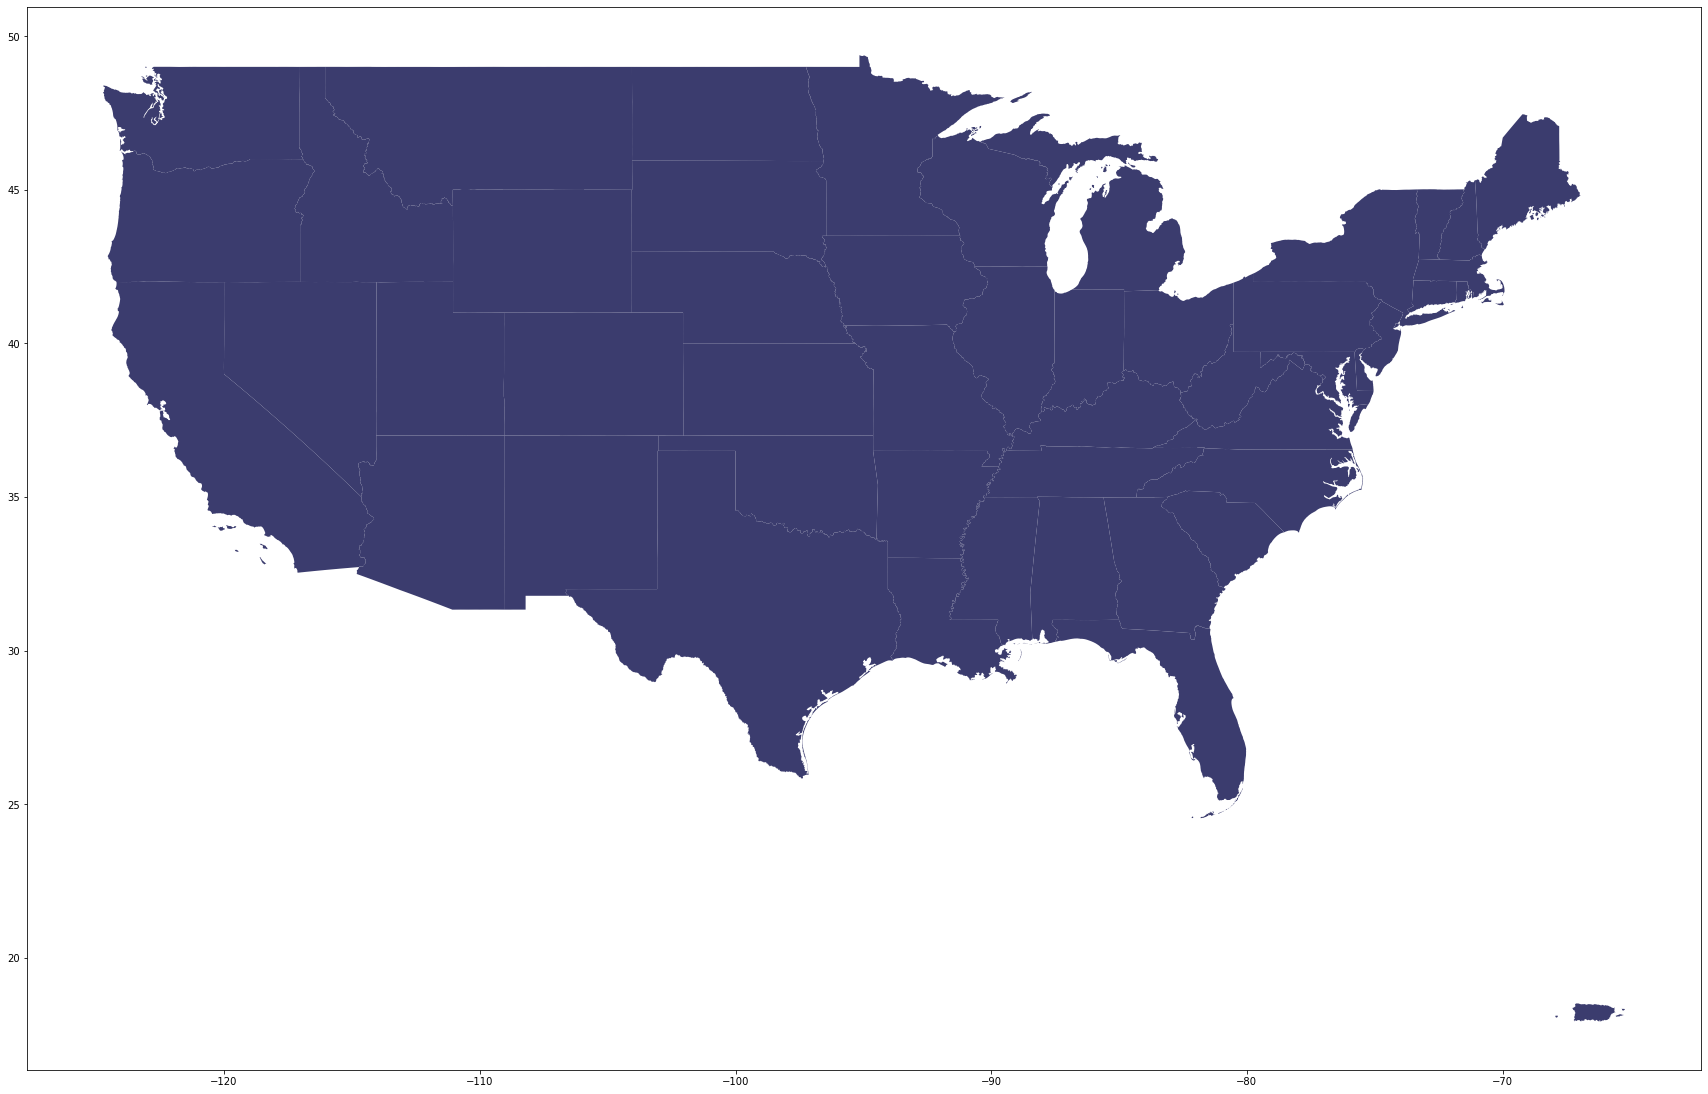

In [26]:
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');


In [4]:
Alberto = pd.read_csv('Alberto.csv')
Alberto.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,05/25/2018 11:00,19.7,86.8,40,1005,NNE at 6 MPH (20 deg),Subtropical Storm,Alberto,05/25/2018 10:44,Stewart
1,1A,05/25/2018 14:00,19.5,86.5,40,1005,Stationary,Subtropical Storm,Alberto,05/25/2018 13:36,Stewart
2,2,05/25/2018 17:00,19.4,86.3,40,1005,E at 2 MPH (90 deg),Subtropical Storm,Alberto,05/25/2018 16:50,Stewart
3,2A,05/25/2018 20:00,19.2,86.0,40,1006,E at 2 MPH (90 deg),Subtropical Storm,Alberto,05/25/2018 19:53,Beven
4,3,05/25/2018 23:00,19.4,85.7,40,1006,E at 5 MPH (90 deg),Subtropical Storm,Alberto,05/25/2018 22:44,Beven


In [5]:
Alberto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  37 non-null     object 
 1   Date            37 non-null     object 
 2   Lat             37 non-null     float64
 3   Long            37 non-null     float64
 4   Wind            37 non-null     int64  
 5   Pres            37 non-null     int64  
 6   Movement        37 non-null     object 
 7   Type            37 non-null     object 
 8   Name            37 non-null     object 
 9   Received        37 non-null     object 
 10  Forecaster      37 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.3+ KB


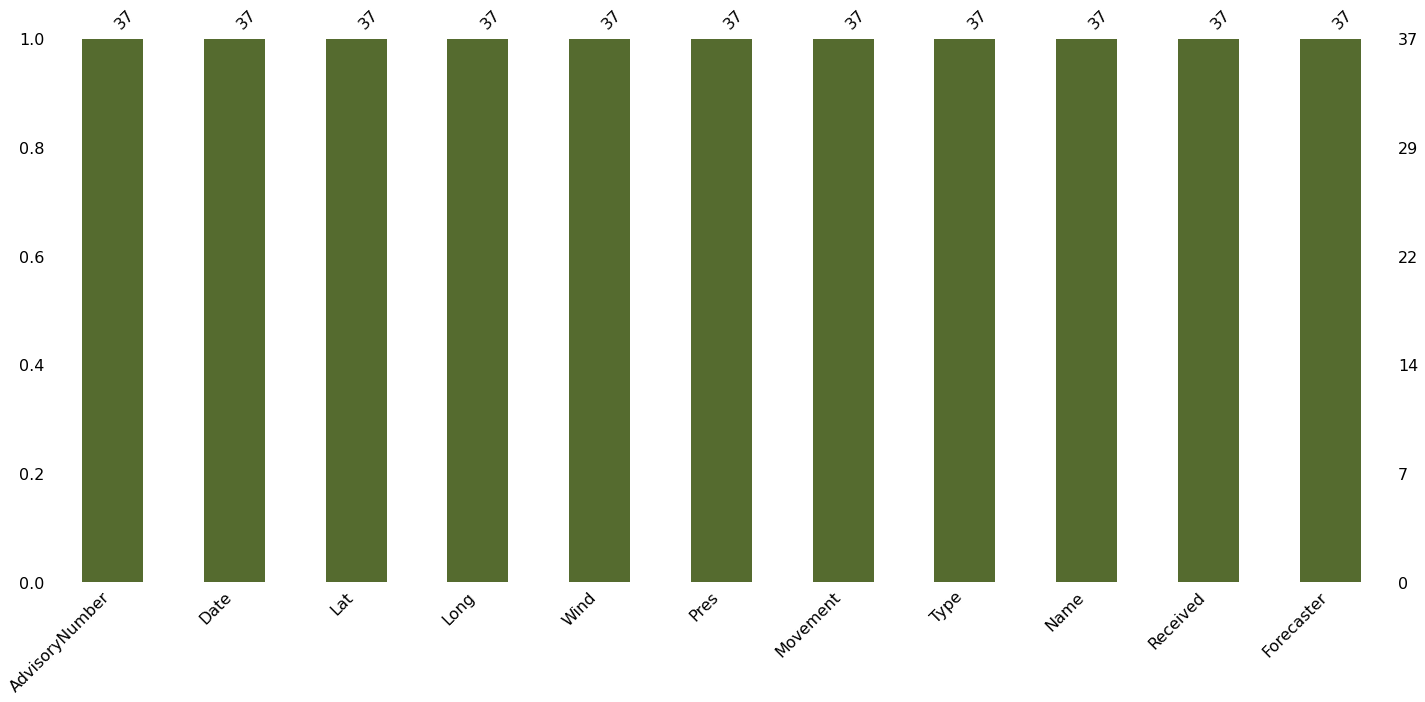

In [6]:
msn.bar(Alberto, color='darkolivegreen');

In [7]:
Alberto.describe()

,Lat,Long,Wind,Pres
count,37.000000,37.000000,37.000000,37.000000
mean,27.902703,85.727027,43.243243,998.081081
std,6.932551,0.970008,10.879148,5.182119
min,19.100000,83.900000,30.000000,990.000000
25%,22.800000,85.100000,40.000000,994.000000
50%,28.000000,85.800000,40.000000,998.000000
75%,30.900000,86.200000,50.000000,1002.000000
max,44.900000,87.900000,65.000000,1006.000000


In [8]:
Alberto  = Alberto.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
Alberto.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,05/25/2018 11:00,19.7,86.8,40,1005,NNE at 6 MPH (20 deg),Subtropical Storm,Alberto
1,05/25/2018 14:00,19.5,86.5,40,1005,Stationary,Subtropical Storm,Alberto
2,05/25/2018 17:00,19.4,86.3,40,1005,E at 2 MPH (90 deg),Subtropical Storm,Alberto
3,05/25/2018 20:00,19.2,86.0,40,1006,E at 2 MPH (90 deg),Subtropical Storm,Alberto
4,05/25/2018 23:00,19.4,85.7,40,1006,E at 5 MPH (90 deg),Subtropical Storm,Alberto


In [9]:
Alberto['Long'] = 0 - Alberto['Long']
Alberto.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,05/25/2018 11:00,19.7,-86.8,40,1005,NNE at 6 MPH (20 deg),Subtropical Storm,Alberto
1,05/25/2018 14:00,19.5,-86.5,40,1005,Stationary,Subtropical Storm,Alberto
2,05/25/2018 17:00,19.4,-86.3,40,1005,E at 2 MPH (90 deg),Subtropical Storm,Alberto
3,05/25/2018 20:00,19.2,-86.0,40,1006,E at 2 MPH (90 deg),Subtropical Storm,Alberto
4,05/25/2018 23:00,19.4,-85.7,40,1006,E at 5 MPH (90 deg),Subtropical Storm,Alberto


In [10]:
Alberto['coordinates'] = Alberto[['Long', 'Lat']].values.tolist()
Alberto.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,05/25/2018 11:00,19.7,-86.8,40,1005,NNE at 6 MPH (20 deg),Subtropical Storm,Alberto,"[-86.8, 19.7]"
1,05/25/2018 14:00,19.5,-86.5,40,1005,Stationary,Subtropical Storm,Alberto,"[-86.5, 19.5]"
2,05/25/2018 17:00,19.4,-86.3,40,1005,E at 2 MPH (90 deg),Subtropical Storm,Alberto,"[-86.3, 19.4]"
3,05/25/2018 20:00,19.2,-86.0,40,1006,E at 2 MPH (90 deg),Subtropical Storm,Alberto,"[-86.0, 19.2]"
4,05/25/2018 23:00,19.4,-85.7,40,1006,E at 5 MPH (90 deg),Subtropical Storm,Alberto,"[-85.7, 19.4]"


In [11]:
Alberto['coordinates'] = Alberto['coordinates'].apply(Point)
Alberto.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,05/25/2018 11:00,19.7,-86.8,40,1005,NNE at 6 MPH (20 deg),Subtropical Storm,Alberto,POINT (-86.8 19.7)
1,05/25/2018 14:00,19.5,-86.5,40,1005,Stationary,Subtropical Storm,Alberto,POINT (-86.5 19.5)
2,05/25/2018 17:00,19.4,-86.3,40,1005,E at 2 MPH (90 deg),Subtropical Storm,Alberto,POINT (-86.3 19.4)
3,05/25/2018 20:00,19.2,-86.0,40,1006,E at 2 MPH (90 deg),Subtropical Storm,Alberto,POINT (-86 19.2)
4,05/25/2018 23:00,19.4,-85.7,40,1006,E at 5 MPH (90 deg),Subtropical Storm,Alberto,POINT (-85.7 19.4)


In [13]:
type(Alberto)

pandas.core.frame.DataFrame

In [14]:
type(Alberto['coordinates'])

pandas.core.series.Series

In [15]:
# Convert the count df to geodf
Alberto= geopandas.GeoDataFrame(Alberto, geometry='coordinates')
Alberto.tail()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
32,05/30/2018 05:00,37.2,-87.9,35,998,N at 15 MPH (10 deg),Tropical Depression,ALBERTO,POINT (-87.90000 37.20000)
33,05/30/2018 11:00,38.7,-87.4,30,997,NNE at 17 MPH (24 deg),Tropical Depression,ALBERTO,POINT (-87.40000 38.70000)
34,05/30/2018 17:00,40.5,-86.4,30,998,NNE at 23 MPH (25 deg),Tropical Depression,ALBERTO,POINT (-86.40000 40.50000)
35,05/30/2018 23:00,42.4,-85.3,30,996,NNE at 26 MPH (25 deg),Tropical Depression,ALBERTO,POINT (-85.30000 42.40000)
36,05/31/2018 05:00,44.9,-83.9,30,994,NNE at 35 MPH (20 deg),Post-Tropical Cyclone,Alberto,POINT (-83.90000 44.90000)


In [16]:
type(Alberto)


geopandas.geodataframe.GeoDataFrame

In [17]:
type(Alberto['coordinates'])


geopandas.geoseries.GeoSeries

In [18]:
Alberto[Alberto['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates


In [19]:
Alberto.groupby('Name').Type.count()


Name
ALBERTO     5
Alberto    29
LBERTO      3
Name: Type, dtype: int64

In [21]:
print("Mean wind speed of Hurricane Alberto is {} mph and it can go up to {} mph maximum".format(round(Alberto.Wind.mean(),4),
                                                                                         Alberto.Wind.max()))

Mean wind speed of Hurricane Alberto is 43.2432 mph and it can go up to 65 mph maximum


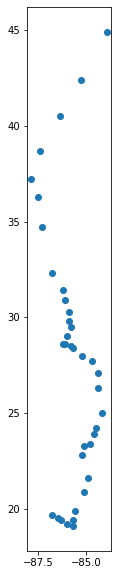

In [22]:
Alberto.plot(figsize=(20,10));

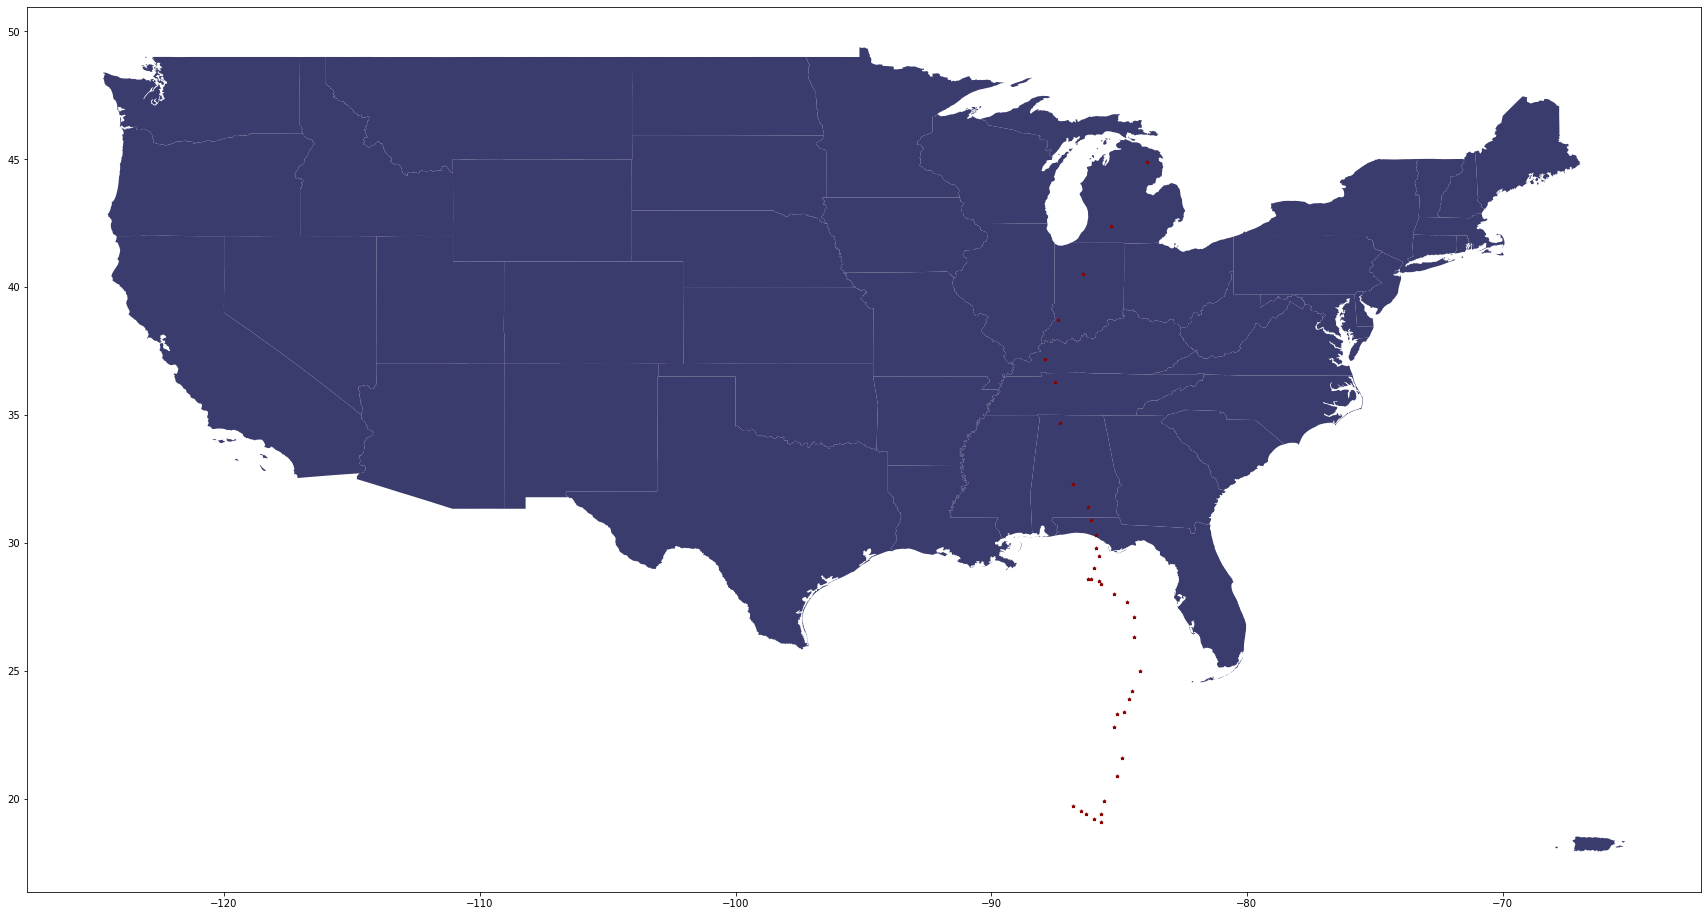

In [27]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
Alberto.plot(ax=base, color='darkred', marker="*", markersize=10);

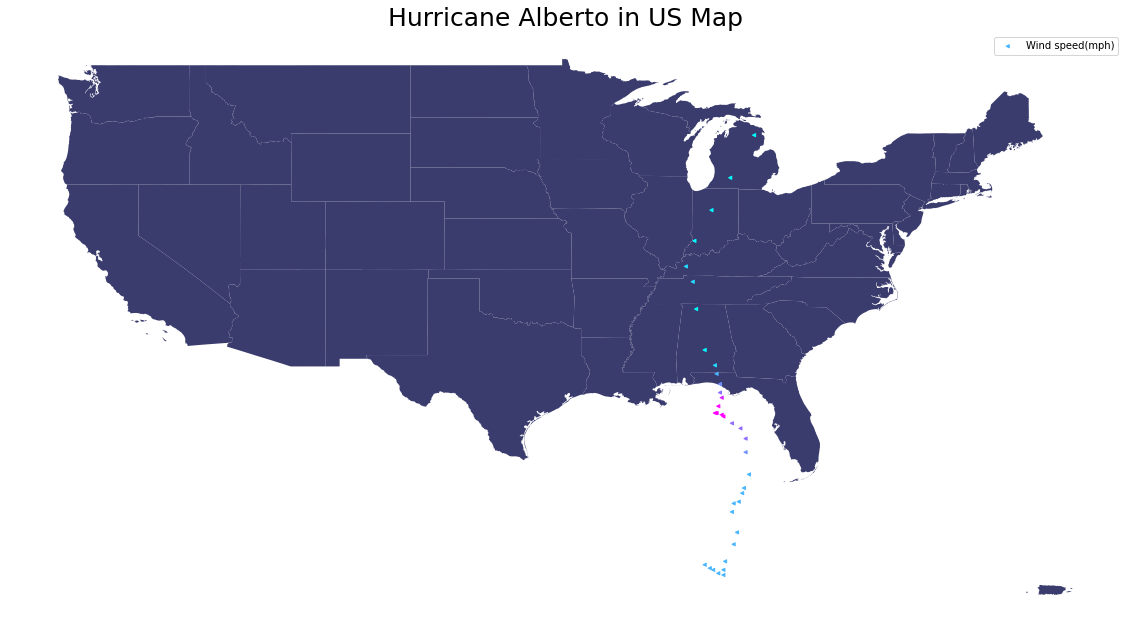

In [39]:
fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
Alberto.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool',label='Wind speed(mph)')
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Alberto in US Map", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');